# Chapter 06: Special Types of Data
## Prof. Leandro Nunes de Castro

In [1]:
# This content was created as a supporting material for the book
# EXPLORATORY DATA ANALYSIS: Descriptive Analysis, Visualization and Dashboard Design (with codes in Python)
# authored by Leandro de Castro (c), 2023-2024
# All rights reserved

# Chapter 6 - Special Types of Data

## 6.1 Time Series Data Analysis 

In [3]:
# Loading dataset1
# https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
import pandas as pd

dclimate = pd.read_csv('DailyDelhiClimateTrain.csv')
dclimate.shape

(1462, 5)

In [4]:
pd.options.display.float_format = '{:.3f}'.format
dclimate.head

<bound method NDFrame.head of             date  meantemp  humidity  wind_speed  meanpressure
0     2013-01-01    10.000    84.500       0.000      1015.667
1     2013-01-02     7.400    92.000       2.980      1017.800
2     2013-01-03     7.167    87.000       4.633      1018.667
3     2013-01-04     8.667    71.333       1.233      1017.167
4     2013-01-05     6.000    86.833       3.700      1016.500
...          ...       ...       ...         ...           ...
1457  2016-12-28    17.217    68.043       3.548      1015.565
1458  2016-12-29    15.238    87.857       6.000      1016.905
1459  2016-12-30    14.095    89.667       6.267      1017.905
1460  2016-12-31    15.053    87.000       7.325      1016.100
1461  2017-01-01    10.000   100.000       0.000      1016.000

[1462 rows x 5 columns]>

In [5]:
dclimate.describe()

meantemp  humidity  wind_speed  meanpressure
count  1462.000  1462.000    1462.000      1462.000
mean     25.496    60.772       6.802      1011.105
std       7.348    16.770       4.562       180.232
min       6.000    13.429       0.000        -3.042
25%      18.857    50.375       3.475      1001.580
50%      27.714    62.625       6.222      1008.563
75%      31.306    72.219       9.238      1014.945
max      38.714   100.000      42.220      7679.333

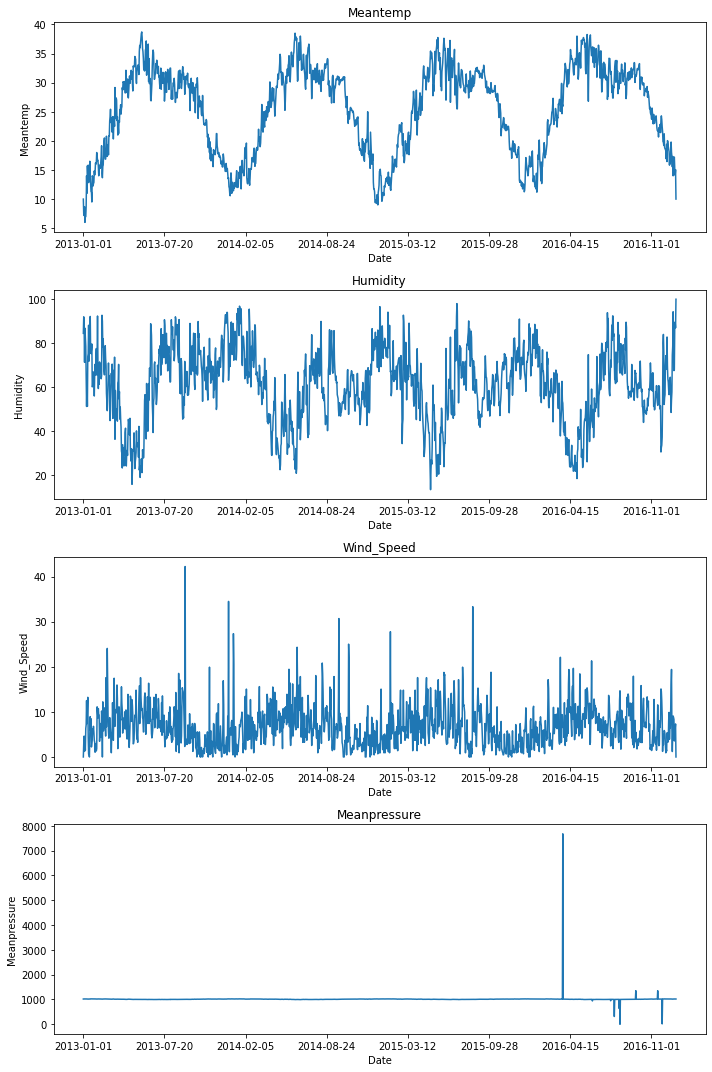

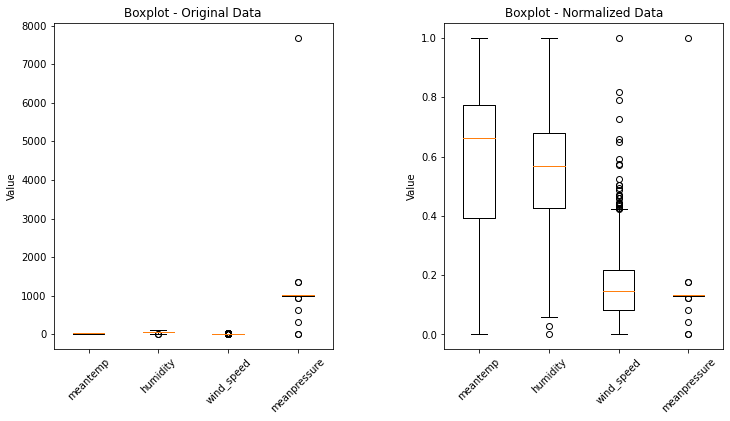

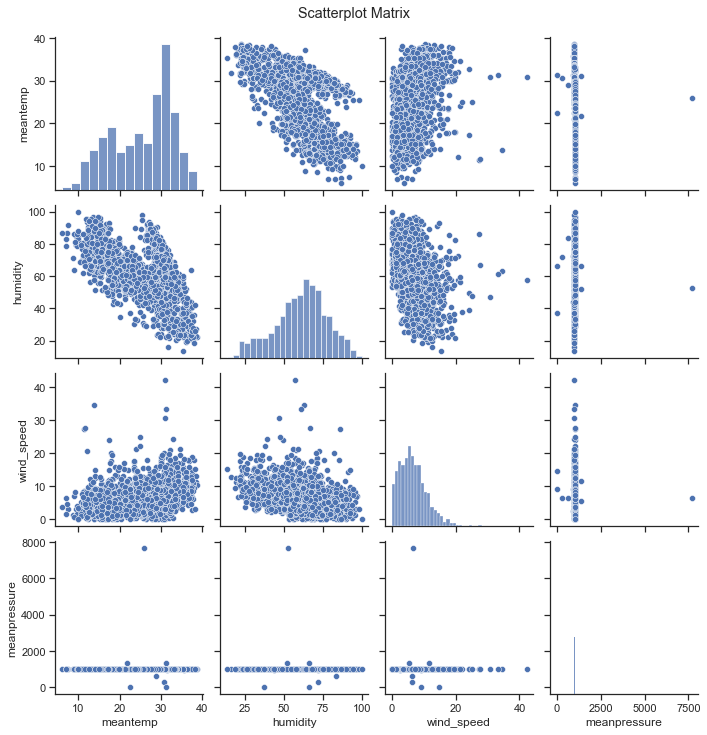

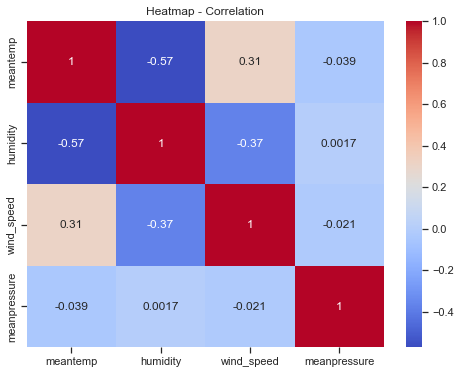

In [8]:
# Code to generate the line charts, boxplots, scatterplot matrix and heatmap
# of the Daily Delhi Climate Train Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Line charts for the Daily Delhi Climate Train Data
df = pd.read_csv('DailyDelhiClimateTrain.csv')
dDelhi = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'date']]
fig, axes = plt.subplots(nrows=4, figsize=(10, 15))
vars_and_indices = [('meantemp', 0), ('humidity', 1), ('wind_speed', 2), ('meanpressure', 3)]
for var, i in vars_and_indices:
    axes[i].plot(dDelhi['date'], dDelhi[var], linestyle='-')
    axes[i].set_title(var.replace('-', ' ').title())
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(var.replace('-', ' ').title())
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# Box plots for the Daily Delhi Climate Train Data
dDelhi = pd.read_csv('DailyDelhiClimateTrain.csv')
variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
dDelhi_normalized = (dDelhi[variables] - dDelhi[variables].min()) / (dDelhi[variables].max() - dDelhi[variables].min())
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(dDelhi[variables].values)
axes[0].set_title('Boxplot - Original Data')
axes[0].set_ylabel('Value')
axes[0].set_xticklabels(variables, rotation=45)
axes[1].boxplot(dDelhi_normalized.values)
axes[1].set_title('Boxplot - Normalized Data')
axes[1].set_ylabel('Value')
axes[1].set_xticklabels(variables, rotation=45)
plt.subplots_adjust(wspace=0.4)
plt.show()

# Scatterplot matrix and Heatmap for the Daily Delhi Climate Train Data
dDelhi = pd.read_csv('DailyDelhiClimateTrain.csv')
variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
sns.set(style='ticks')
sns.pairplot(dDelhi[variables])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()
corr_matrix = dDelhi[variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap - Correlation')
plt.show()

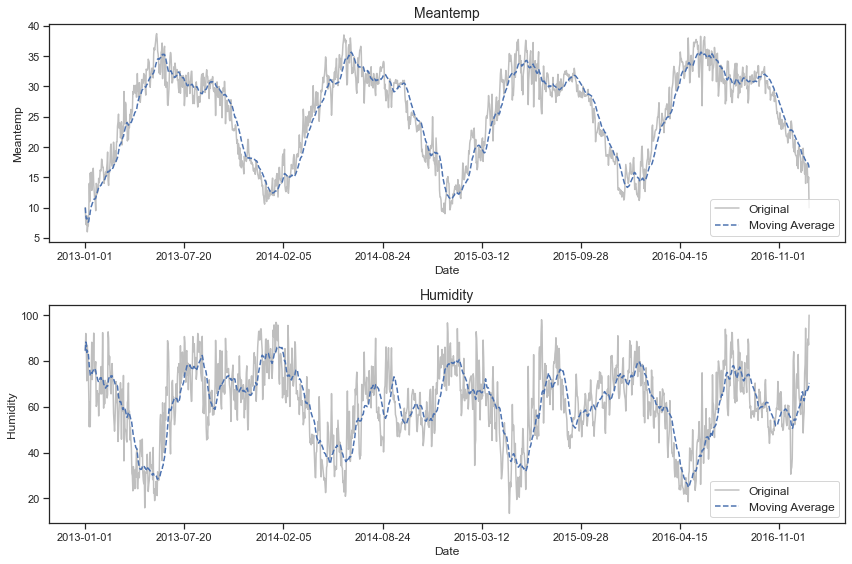

In [51]:
# Moving averages for variables 'meantemp' and 'humidity' 
# of the Daily Delhi Climate Train Data

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and extract the variables
df = pd.read_csv('DailyDelhiClimateTrain.csv')
dDelhi = df[['meantemp', 'humidity', 'date']]

# Create a single figure with subplots stacked vertically
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))
vars_and_indices = [('meantemp', 0), ('humidity', 1)]
for var, i in vars_and_indices:
    axes[i].plot(dDelhi['date'], dDelhi[var], linestyle='-', color='gray', 
                 alpha=.5, label='Original')
    axes[i].plot(dDelhi['date'], dDelhi[var].rolling(window=20, min_periods=1).mean(), 
                 linestyle='--', label='Moving Average')
    axes[i].set_title(var.replace('-', ' ').title(), fontsize=14) 
    axes[i].set_xlabel('Date', fontsize=12) 
    axes[i].set_ylabel(var.replace('-', ' ').title(), fontsize=12)
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axes[i].legend(fontsize=12) 

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

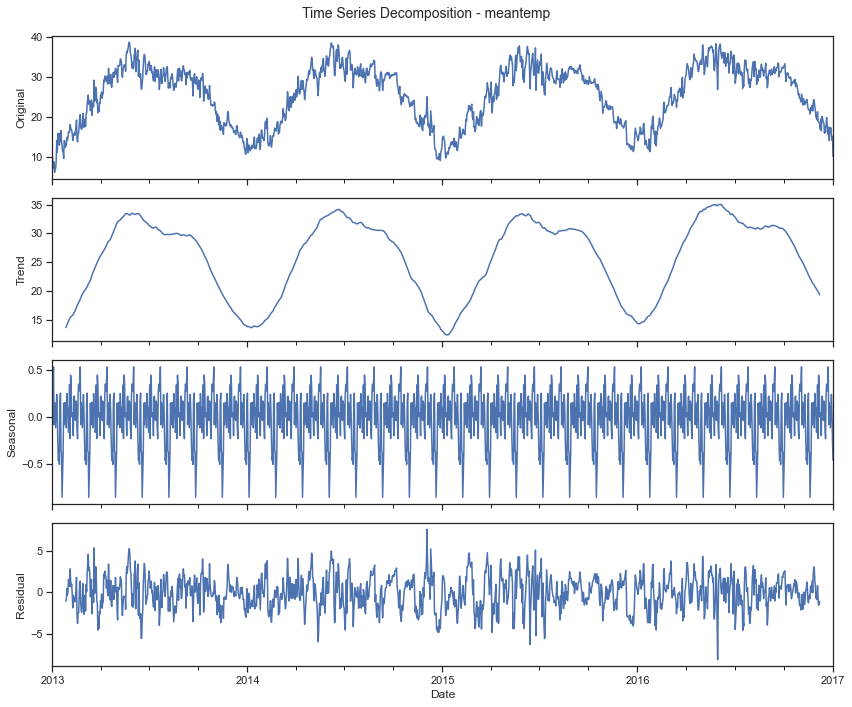

In [9]:
# Time series decomposition of the 'meantemp' variable 
# of the Daily Delhi Climate Train data

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
dDelhi = pd.read_csv('DailyDelhiClimateTrain.csv')

# Extract the variable and set the date column as the index
variable = 'meantemp'
dDelhi['date'] = pd.to_datetime(dDelhi['date'])
dDelhi.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(dDelhi[variable], model='additive', period = 50)

# Plot the original, trend, seasonal, and residual components
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
dDelhi[variable].plot(ax=axes[0])
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition - {}'.format(variable), fontsize=14)
plt.tight_layout()
plt.show()

## 6.2 Text and Document Data 

In [13]:
import nltk
from nltk.corpus import movie_reviews

# Download the IMDb dataset
nltk.download('movie_reviews')

# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Calculate the dimensions
num_documents = len(documents)
num_categories = len(set(category for _, category in documents))

# Print the dimensions
print("Number of Documents (Reviews):", num_documents)
print("Number of Categories (Labels):", num_categories)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Number of Documents (Reviews): 2000
Number of Categories (Labels): 2


In [14]:
import nltk
from nltk.corpus import movie_reviews

# Download the IMDb dataset
nltk.download('movie_reviews')

# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Print the first 10 objects in the dataset
for i, (words, category) in enumerate(documents[:10], 1):
    print(f"Document {i}:")
    print(" ".join(words[:80]), "...")
    print("Category:", category)
    print()
len(documents)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Document 1:
plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what ' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , ...
Category: neg

Document 2:
the happy bastard ' s quick movie review damn that y2k bug . it ' s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . little do they know the power within . . . going for the ...
Category: neg

Document 3:
it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch . based on the late 1960 ' s television show by the same name , the mod squad tell

2000

In [10]:
# Code to structure texts using Lexical Representations

import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download the IMDb corpus and the stoplist
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Tokenization
tokenized_docs = [" ".join(words) for words, category in documents]

# Stopwords removal and printing
stop_words = set(stopwords.words('english'))
print("Stopwords contained in the stopwords file in NLTK:")
print(stop_words)
filtered_docs = [" ".join([word for word in word_tokenize(doc.lower()) 
                           if word.isalpha() and word not in stop_words])
                 for doc in tokenized_docs]

# Stemming
stemmer = PorterStemmer()
stemmed_docs = [" ".join([stemmer.stem(word) for word in word_tokenize(doc)])
                for doc in filtered_docs]

# Create the data matrix using different methods
# Binary
binary_vectorizer = CountVectorizer(binary=True)
data_matrix_binary = binary_vectorizer.fit_transform(stemmed_docs)

# Absolute Frequency
count_vectorizer = CountVectorizer()
data_matrix_abs_freq = count_vectorizer.fit_transform(stemmed_docs)

# Relative Frequency (Term-Frequency)
tf_vectorizer = CountVectorizer()
data_matrix_rel_freq = tf_vectorizer.fit_transform(stemmed_docs)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
data_matrix_tfidf = tfidf_vectorizer.fit_transform(stemmed_docs)

# Printing the feature names (words) 
print("\nFeature names (words) for the Data Matrix:")
print(binary_vectorizer.get_feature_names_out()[:20])

# Printing each data matrix
print("\nBinary Data Matrix:")
print(data_matrix_binary[:5, :20].toarray())
print("\nAbsolute Frequency Data Matrix:")
print(data_matrix_abs_freq[:5, :20].toarray())
print("\nRelative Frequency (Term-Frequency) Data Matrix:")
print(data_matrix_rel_freq[:5, :20].toarray())
print("\nTF-IDF Data Matrix:")
print(data_matrix_tfidf[:5, :20].toarray())

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords contained in the stopwords file in NLTK:
{'some', "should've", 'then', 'more', 'up', 'against', 'into', 'do', "couldn't", 'few', 'after', "wouldn't", 'doesn', "aren't", 'because', "it's", 'weren', 'the', 'which', 'she', 'your', "she's", 'hasn', 'for', "shan't", "you'd", 'm', 'wouldn', 'other', 'his', 'being', 'these', 's', 'does', 'when', 'had', 'him', 'as', 'herself', 'needn', 'same', 'each', 'its', 'own', 're', 'what', "didn't", 'yourself', 'were', 'did', 'in', 'over', 'haven', 'has', 'very', 'mightn', 'wasn', 'below', 'yourselves', 'a', 'no', 'most', 'them', "mightn't", 'with', 'is', 'on', 'so', 'll', 'or', "you're", "don't", 'both', "weren't", 'down', 'during', 'if', 'should', "isn't", 'how', 'why', "you've", 'whom', 'but', 'it', 'there', 'through', 'by', 'until', 'have', 'now', 'who', 've', 'y', 'are', 'only', 'where', 'd', 'we', 'theirs', 'our', 'shan', 'this', 'he', 'while', 'ain', 'ourselves', 'their', 'an', 'that', "that'll", 'about', 'further', 'himself', 'of', 'too

In [11]:
# Code to generate simple descriptive statistics for text data

import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download the IMDb dataset and stopwords corpus
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Initialize variables for descriptive statistics
word_count = 0
unique_words = set()
word_length_sum = 0
sentence_count = 0
sentence_length_sum = 0
stopwords_count = 0
word_frequencies = Counter()

for document, _ in documents:
    # Tokenization and lowercase
    tokens = word_tokenize(document.lower())
    # Remove punctuation and digits
    tokens = [token for token in tokens if token.isalpha()]
    # Update word count and unique words
    word_count += len(tokens)
    unique_words.update(tokens)
    # Update word length sum
    word_length_sum += sum(len(word) for word in tokens)
    # Update word frequencies
    word_frequencies.update(tokens)
    # Sentence tokenization
    sentences = sent_tokenize(document)
    # Update sentence count and sentence length sum
    sentence_count += len(sentences)
    sentence_length_sum += sum(len(word_tokenize(sentence)) for sentence in sentences)
    # Count stopwords
    stopwords_count += sum(1 for token in tokens if token in stopwords.words('english'))

# Calculate descriptive statistics and print the results
print("Descriptive Statistics for the IMDb Dataset:")
print("Word Count:", word_count)
print("Unique Word Count:", len(unique_words))
print("Vocabulary Size:", len(unique_words))
print("Average Word Length:", word_length_sum / word_count)
print("Most Common Words:", word_frequencies.most_common(10))
print("Sentence Count:", sentence_count)
print("Average Sentence Length:", sentence_length_sum / sentence_count)
print("Number of Stopwords:", stopwords_count)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Descriptive Statistics for the IMDb Dataset:
Word Count: 1274165
Unique Word Count: 38107
Vocabulary Size: 38107
Average Word Length: 4.540951917530304
Most Common Words: [('the', 76276), ('a', 37995), ('and', 35404), ('of', 33972), ('to', 31772), ('is', 26054), ('in', 21611), ('it', 16059), ('that', 15912), ('as', 11349)]
Sentence Count: 65258
Average Sentence Length: 23.369119494927826
Number of Stopwords: 595438


In [12]:
# Code to generate specific descriptive statistics for text data

import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import textstat
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Download the IMDb dataset and stopwords corpus
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load the movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Part-of-Speech (POS) Distribution
pos_tags = [tag for words, _ in documents for word, tag in nltk.pos_tag(word_tokenize(words))]
pos_distribution = Counter(pos_tags)

# Flesch-Kincaid Grade Level and Automated Readability Index (ARI)
all_reviews_text = " ".join([text for text, _ in documents])
flesch_kincaid_grade = textstat.flesch_kincaid_grade(all_reviews_text)
automated_readability_index = textstat.automated_readability_index(all_reviews_text)

# Co-occurrence Matrix
preprocessed_documents = [" ".join([word.lower() for word in word_tokenize(words)])
                          for words, _ in documents]
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(preprocessed_documents)
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

# Print the results
print("Part-of-Speech Distribution:")
print(pos_distribution)
print("\nFlesch-Kincaid Grade Level:", flesch_kincaid_grade)
print("\nAutomated Readability Index:", automated_readability_index)
print("\nCo-occurrence Matrix:")
print(tfidf_matrix.toarray())

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Part-of-Speech Distribution:
Counter({'NN': 278642, 'IN': 155028, 'DT': 148777, 'JJ': 129582, 'RB': 82371, ',': 77717, '.': 71360, 'VBZ': 68920, 'NNS': 65134, 'VB': 50532, 'PRP': 50382, 'CC': 48199, 'TO': 31825, 'VBN': 27849, 'VBP': 27691, 'VBG': 27422, 'PRP$': 21769, 'VBD': 21158, '``': 18112, 'CD': 13958, 'MD': 13435, ')': 11782, '(': 11665, 'POS': 11514, 'WP': 9205, ':': 8370, 'WDT': 7612, 'WRB': 7195, 'RP': 6795, 'JJS': 4429, 'JJR': 4058, 'EX': 3316, 'RBR': 2448, 'RBS': 1319, 'PDT': 1272, 'NNP': 996, 'FW': 887, "''": 861, 'UH': 530, 'WP$': 435, '$': 334, 'SYM': 72, '#': 55, 'NNPS': 8, 'LS': 1})

Flesch-Kincaid Grade Level: 8.7

Automated Readability Index: 11.2

Co-occurrence Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


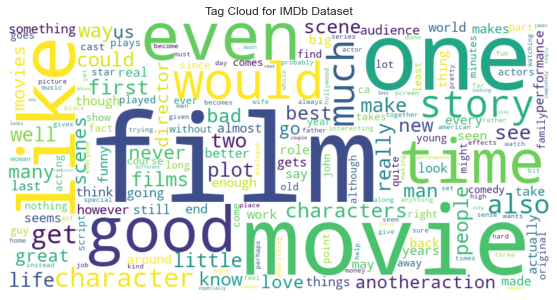

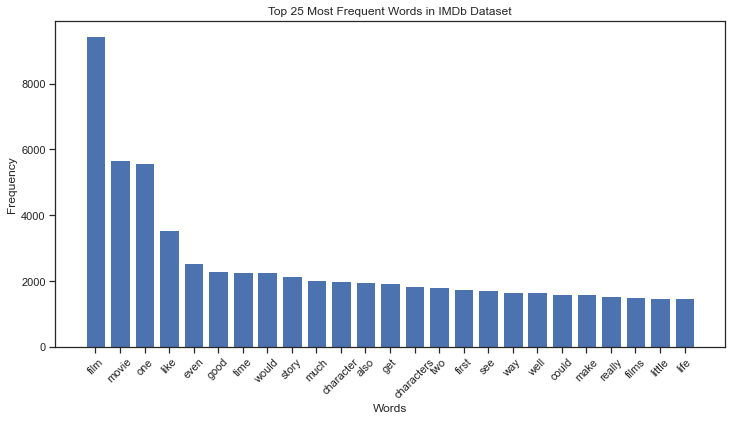

In [13]:
# Code to generate a Tag Cloud and a Frequency Distribution 
# of the words in the IMDb corpus

import nltk
from nltk.corpus import movie_reviews
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the IMDb dataset and stopwords corpus
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Concatenate all the reviews into a single text
all_reviews_text = " ".join([text for text, _ in documents])

# Tokenization and Preprocessing
tokens = word_tokenize(all_reviews_text.lower())
tokens = [token for token in tokens if token.isalpha()]
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

# Calculate word frequency
word_frequency = FreqDist(filtered_tokens)

# Generate the tag cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

# Display the tag cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Cloud for IMDb Dataset')
plt.show()

# Sort the word_frequency dictionary by frequency in descending order
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))

# Get the first words and their frequencies
top_25_words = list(sorted_word_frequency.keys())[:25]
top_25_frequencies = list(sorted_word_frequency.values())[:25]

# Plot the bar chart for the first 20 words
plt.figure(figsize=(12, 6))
plt.bar(top_25_words, top_25_frequencies)
plt.title('Top 25 Most Frequent Words in IMDb Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


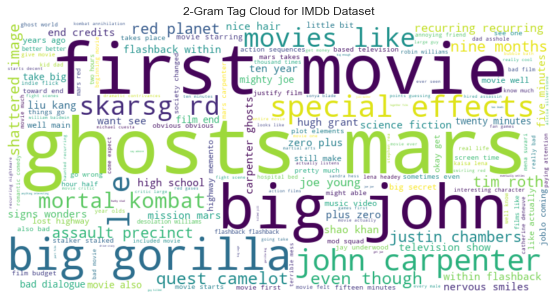

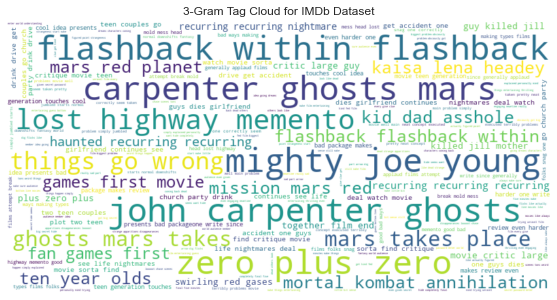

In [14]:
# Code to generate the bi-gram and the tri-gram 
# for the IMDb corpus in NLTK

import nltk
from nltk.corpus import movie_reviews
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the IMDb dataset and stopwords corpus
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')

# Load the movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Select only 10% of the documents
num_documents = int(0.01 * len(documents))
documents = documents[:num_documents]

# Concatenate all the reviews into a single text
all_reviews_text = " ".join([text for text, _ in documents])

# Tokenization and Preprocessing
tokens = word_tokenize(all_reviews_text.lower())
tokens = [token for token in tokens if token.isalpha()]
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

# Generate 2-grams
bi_grams = list(ngrams(filtered_tokens, 2))
bi_gram_freq_dist = nltk.FreqDist([" ".join(gram) for gram in bi_grams])

# Generate 3-grams
tri_grams = list(ngrams(filtered_tokens, 3))
tri_gram_freq_dist = nltk.FreqDist([" ".join(gram) for gram in tri_grams])

# Generate the tag cloud for 2-grams
bi_gram_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bi_gram_freq_dist)

# Generate the tag cloud for 3-grams
tri_gram_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tri_gram_freq_dist)

# Display the tag clouds
plt.figure(figsize=(10, 5))
plt.imshow(bi_gram_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('2-Gram Tag Cloud for IMDb Dataset')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(tri_gram_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('3-Gram Tag Cloud for IMDb Dataset')
plt.show()


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


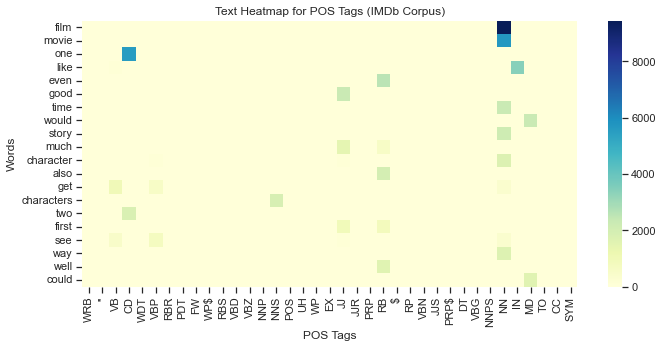

In [15]:
# Code to generate the heatmap for POS Tags
# for the IMDb corpus 

import nltk
from nltk.corpus import movie_reviews
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the IMDb movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Tokenization and Preprocessing
def preprocess_document(document):
    tokens = nltk.word_tokenize(document.lower())
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Perform POS tagging and calculate word frequency in each tag category
def calculate_word_frequency_with_pos(documents):
    word_frequency = {}
    all_tags = set()
    for document in documents:
        tokens = preprocess_document(document[0])
        tagged_tokens = nltk.pos_tag(tokens)
        for word, pos_tag in tagged_tokens:
            if word not in word_frequency:
                word_frequency[word] = {}
            if pos_tag not in word_frequency[word]:
                word_frequency[word][pos_tag] = 0
            word_frequency[word][pos_tag] += 1
            all_tags.add(pos_tag)
    
    # Sort words by frequency and select the top 20
    sorted_words = sorted(word_frequency.items(), key=lambda item: sum(item[1].values()), reverse=True)
    top_20_words = [word for word, _ in sorted_words[:20]]
    
    # Create the matrix
    all_words = list(top_20_words)
    matrix = []
    for word in all_words:
        row = [word_frequency[word].get(tag, 0) for tag in all_tags]
        matrix.append(row)
    return matrix, list(all_words), list(all_tags)

# Calculate word frequency with POS tags
matrix, words, tag_categories = calculate_word_frequency_with_pos(documents)

# Convert the matrix to a DataFrame for Seaborn heatmap
import pandas as pd
df = pd.DataFrame(matrix, index=words, columns=tag_categories)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df, cmap='YlGnBu', annot=False, fmt='d', cbar=True)
plt.title('Text Heatmap for POS Tags (IMDb Corpus)')
plt.xlabel('POS Tags')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


In [16]:
# Code to generate the Dependency Parse Tree for the IMDb 
# dataset in NLTK

import nltk
from nltk.corpus import movie_reviews
import spacy
from spacy import displacy

# Download the IMDb dataset
nltk.download('movie_reviews')

# Load the movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Select the documents to be displayed
documents = documents[:1]

# Concatenate all the reviews into a single text
all_reviews_text = " ".join([text for text, _ in documents])

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(all_reviews_text)

# Get individual sentences
sentences = list(doc.sents)

# Print each sentence and its dependency tree
for sentence in sentences:
    print("Sentence:", sentence)
    displacy.render(sentence, style='dep', jupyter=True)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lnune\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Sentence: plot : two teen couples go to a church party , drink and then drive . 



Sentence: they get into an accident . 



Sentence: one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 



Sentence: what's the deal ? 



Sentence: watch the movie and " sorta " find out . . . 



Sentence: critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 



Sentence: which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 



Sentence: they seem to have taken this pretty neat concept , but executed it terribly . 



Sentence: so what are the problems with the movie ? 



Sentence: well , its main problem is that it's simply too jumbled . 



Sentence: it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's going on . 



Sentence: there are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . 



Sentence: now i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . 



Sentence: it's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . 
and do they make things entertaining , thrilling or even engaging , in the meantime ? 



Sentence: not really . 



Sentence: the sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . 



Sentence: i guess the bottom line with movies like this is that you should always make sure that the audience is " into it " even before they are given the secret password to enter your world of understanding . 



Sentence: i mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! 



Sentence: okay , we get it . . .


Sentence: there 
are people chasing her


Sentence: and we don't know who they are . 



Sentence: do we really need to see it over and over again ? 



Sentence: how about giving us different scenes offering further insight into all of the strangeness going down in the movie ? 



Sentence: apparently , the studio took this film away from its director and chopped it up themselves , and it shows . 



Sentence: there might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess " the suits " decided that turning it into a music video with little edge , would make more sense . 



Sentence: the actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . 



Sentence: but my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . 



Sentence: overall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . 



Sentence: oh , and by the way , this is not a horror or teen slasher flick . . .


Sentence: it's 
just packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . 



Sentence: it also wrapped production two years ago and has been sitting on the shelves ever since . 



Sentence: whatever . .


Sentence: .


Sentence: skip 
it ! 



Sentence: where's joblo coming from ? 



Sentence: a nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvation ( 4/10 ) - lost highway ( 10/10 ) - memento ( 10/10 ) - the others ( 9/10 ) - stir of echoes ( 8/10 ) 



## 6.3 Trees and Networks 

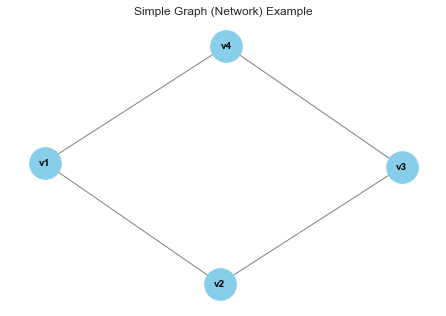

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_node("v1")
G.add_node("v2")
G.add_node("v3")
G.add_node("v4")

# Add edges
G.add_edge("v1", "v2")
G.add_edge("v2", "v3")
G.add_edge("v3", "v4")
G.add_edge("v4", "v1")

# Plot the graph
pos = nx.spring_layout(G)  # Positioning algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')

# Display the plot
plt.title("Simple Graph (Network) Example")
plt.show()

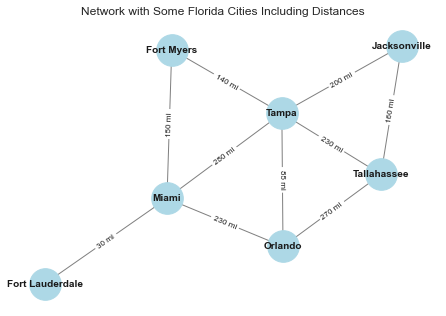

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (cities)
cities = ["Miami", "Orlando", "Tampa", "Jacksonville", "Tallahassee", "Fort Lauderdale", "Fort Myers"]

G.add_nodes_from(cities)

# Add edges (connections between cities) with distances
edges = [
    ("Miami", "Orlando", {"distance": 230}),
    ("Miami", "Tampa", {"distance": 280}),
    ("Miami", "Fort Lauderdale", {"distance": 30}),
    ("Orlando", "Tampa", {"distance": 85}),
    ("Tampa", "Jacksonville", {"distance": 200}),
    ("Jacksonville", "Tallahassee", {"distance": 160}),
    ("Tallahassee", "Orlando", {"distance": 270}),
    ("Tallahassee", "Tampa", {"distance": 230}),
    ("Fort Myers", "Tampa", {"distance": 140}),
    ("Fort Myers", "Miami", {"distance": 150}),  # Distance between Fort Myers and Miami
]

G.add_edges_from(edges)

# Plot the network with distances as edge labels
pos = nx.spring_layout(G)  # Positioning algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)

# Add edge labels (distances)
edge_labels = {(u, v): f"{attr['distance']} mi" for u, v, attr in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Display the plot
plt.title("Network with Some Florida Cities Including Distances")
plt.show()


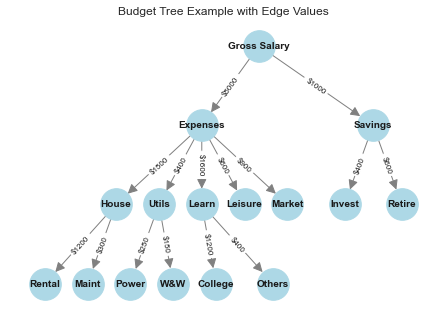

In [20]:
# Script to generate a directed and weighted budget tree
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (expense categories)
nodes = ["Gross Salary", "Expenses","House","Learn","Leisure","Market","Utils",
    "College","Others","Power","W&W","Rental","Maint","Savings","Invest","Retire"]

# Add edges (expense relationships) with values
edges = [
    ("Gross Salary", "Expenses", {'value': 5000}),
    ("Gross Salary", "Savings", {'value': 1000}),
    ("Expenses", "House", {'value': 1500}),
    ("Expenses", "Learn", {'value': 1600}),
    ("Expenses", "Leisure", {'value': 600}),
    ("Expenses", "Market", {'value': 900}),
    ("Expenses", "Utils", {'value': 400}),
    ("Learn", "College", {'value': 1200}),
    ("Learn", "Others", {'value': 400}),
    ("Utils", "Power", {'value': 250}),
    ("Utils", "W&W", {'value': 150}),
    ("House", "Rental", {'value': 1200}),
    ("House", "Maint", {'value': 300}),
    ("Savings", "Invest", {'value': 400}),
    ("Savings", "Retire", {'value': 600}),
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Manually set node positions
node_positions = {
    "Gross Salary": (11, 12), "Expenses": (7, 8),
    "Savings": (19, 8), "House": (1, 4),
    "Learn": (7, 4), "Leisure": (10, 4),
    "Market": (13, 4), "Utils": (4, 4),
    "College": (8, 0), "Others": (12, 0),
    "Power": (2, 0), "W&W": (5, 0),
    "Rental": (-4, 0), "Maint": (-1, 0),
    "Invest": (17, 4), "Retire": (21, 4),
}

# Get edge labels from edge attributes
edge_labels = {(u, v): f"${attr['value']}" for u, v, attr in G.edges(data=True)}

# Plot the expense tree with manual positions and edge labels
nx.draw(G, pos=node_positions, with_labels=True, node_size=1000, node_color='lightblue', 
        font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_labels, font_size=8)

# Display the plot
plt.title("Budget Tree Example with Edge Values")
#plt.title("Budget Tree Example")
plt.axis("off")
plt.show()


In [21]:
# Nodes and edges that have to be loaded before running the next code

# Add nodes (expense categories)
nodes = ["Gross Salary", "Expenses","House","Learn","Leisure","Market","Utils",
    "College","Others","Power","W&W","Rental","Maint","Savings","Invest","Retire"]

# Add edges (expense relationships) with values
edges = [
    ("Gross Salary", "Expenses", {'value': 5000}),
    ("Gross Salary", "Savings", {'value': 1000}),
    ("Expenses", "House", {'value': 1500}),
    ("Expenses", "Learn", {'value': 1600}),
    ("Expenses", "Leisure", {'value': 600}),
    ("Expenses", "Market", {'value': 900}),
    ("Expenses", "Utils", {'value': 400}),
    ("Learn", "College", {'value': 1200}),
    ("Learn", "Others", {'value': 400}),
    ("Utils", "Power", {'value': 250}),
    ("Utils", "W&W", {'value': 150}),
    ("House", "Rental", {'value': 1200}),
    ("House", "Maint", {'value': 300}),
    ("Savings", "Invest", {'value': 400}),
    ("Savings", "Retire", {'value': 600}),
]

In [22]:
# Code to perform the Descriptive Analysis of trees
# It requires that the nodes and edges are loaded previously

import networkx as nx

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Calculate and print measures
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Calculate height of the tree (maximum depth from root)
height = nx.dag_longest_path_length(G)
print("Height of the tree:", height)

# Calculate degree of each node
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())
print("\nIn-Degree of each node:")
for node in nodes:
    print(f"{node}: {in_degree_dict.get(node, 0)}")
print("\nOut-Degree of each node:")
for node in nodes:
    print(f"{node}: {out_degree_dict.get(node, 0)}")

# Calculate branching factor (average out-degree)
branching_factor = G.number_of_edges() / G.number_of_nodes()
print("\nBranching factor:", branching_factor)

# Calculate and print tree diameter
diameter = 0
for node in nodes:
    if G.out_degree(node) == 0:  # Only consider leaf nodes
        path_lengths = nx.single_source_shortest_path_length(G.reverse(), source=node)
        max_path_length = max(path_lengths.values())
        diameter = max(diameter, max_path_length)
print("Tree Diameter:", diameter)

# Calculate level of each node (depth from the root)
root = "Gross Salary"
level_dict = {root: 0}
for node in nodes:
    if node != root:
        parent = list(G.predecessors(node))[0]  # Assuming single parent
        level_dict[node] = level_dict[parent] + 1
print("\nLevel of each node:")
for node in nodes:
    print(f"{node}: {level_dict[node]}")

Number of nodes: 16
Number of edges: 15
Height of the tree: 3

In-Degree of each node:
Gross Salary: 0
Expenses: 1
House: 1
Learn: 1
Leisure: 1
Market: 1
Utils: 1
College: 1
Others: 1
Power: 1
W&W: 1
Rental: 1
Maint: 1
Savings: 1
Invest: 1
Retire: 1

Out-Degree of each node:
Gross Salary: 2
Expenses: 5
House: 2
Learn: 2
Leisure: 0
Market: 0
Utils: 2
College: 0
Others: 0
Power: 0
W&W: 0
Rental: 0
Maint: 0
Savings: 2
Invest: 0
Retire: 0

Branching factor: 0.9375
Tree Diameter: 3

Level of each node:
Gross Salary: 0
Expenses: 1
House: 2
Learn: 2
Leisure: 2
Market: 2
Utils: 2
College: 3
Others: 3
Power: 3
W&W: 3
Rental: 3
Maint: 3
Savings: 1
Invest: 2
Retire: 2


Genealogical Tree:
|_Queen Elizabeth II
  |_Prince Charles
    |_Prince William
      |_Prince George
      |_Princess Charlotte
      |_Prince Louis
    |_Prince Henry
  |_Princess Anne
  |_Prince Andrew
  |_Prince Edward


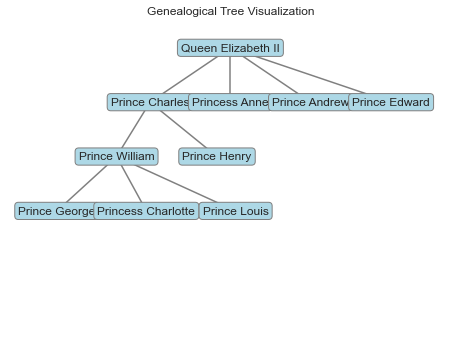

In [26]:
# Code to generate partial genealogic trees of Queen Elizabeth II
# With internal functions

import matplotlib.pyplot as plt

# Define the family members and relationships
family_tree = {
    "Queen Elizabeth II": ["Prince Charles", "Princess Anne", "Prince Andrew", "Prince Edward"],
    "Prince Philip": ["Prince Charles", "Princess Anne", "Prince Andrew", "Prince Edward"],
    "Prince Charles": ["Prince William", "Prince Henry"],
    "Princess Anne": [],
    "Prince Andrew": [],
    "Prince Edward": [],
    "Prince William": ["Prince George", "Princess Charlotte", "Prince Louis"],
}

def plot_genealogy(node, depth=0):
    print("  " * depth + "|_" + node)
    if node in family_tree:
        for child in family_tree[node]:
            plot_genealogy(child, depth + 1)

if __name__ == "__main__":
    print("Genealogical Tree:")
    plot_genealogy("Queen Elizabeth II")
    
    # Plot using Matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    
    def plot_tree(node, x, y, level=0):
        ax.text(x, y, node, ha='center', va='center', 
                bbox=dict(facecolor='lightblue', edgecolor='gray', boxstyle='round,pad=0.3'))
        if node in family_tree:
            num_children = len(family_tree[node])
            child_spacing = 18 / (num_children + 6)
            for i, child in enumerate(family_tree[node]):
                child_x = x + (i - (num_children - 1) / 3) * child_spacing
                child_y = y - 1
                ax.plot([x, child_x], [y, child_y], color='gray')
                plot_tree(child, child_x, child_y, level + 1)
    
    plot_tree("Queen Elizabeth II", 5, 5.5)
    plt.title("Genealogical Tree Visualization")
    plt.axis("off")
    plt.show()

In [23]:
# Treemap example with the Budget Tree synthetic data

import plotly.express as px

# Define data for the treemap
data = {
    'labels': ['Gross Salary','Expenses','Savings','House','Utils','Learn','Leisure','Market',
               'Invest','Retire','Rental','Maint','Power','W&W','College','Others'],
    'parents': ['', 'Gross Salary', 'Gross Salary', 'Expenses', 'Expenses', 'Expenses', 
                'Expenses', 'Expenses', 'Savings', 'Savings', 'House', 'House', 
                'Utils', 'Utils', 'Learn', 'Learn'],
    'values': [6000, 5000, 1000, 1500, 400, 1600, 600, 900, 400, 600, 1200, 300, 250, 
               150, 1200, 400]
}

# Create a treemap
fig = px.treemap(data,names='labels',parents='parents',values='values',branchvalues='total')

# Update font size of labels
fig.update_traces(textinfo='label+percent entry+value')  # Add labels parameter here
fig.update_layout(title_x=.5)

# Show the chart
fig.show()

In [25]:
# Sunburst example with the Budget Tree synthetic data

import plotly.graph_objects as go

# Define data for the sunburst chart
labels = ['Gross Salary','Expenses','Savings','House','Utils','Learn','Leisure','Market',
         'Invest','Retire','Rental','Maint','Power','W&W','College','Others']
parents = ['','Gross Salary','Gross Salary','Expenses','Expenses','Expenses','Expenses',
           'Expenses','Savings','Savings','House','House','Utils','Utils','Learn','Learn']
values = [6000, 5000, 1000, 1500, 400, 1600, 600, 900, 400, 600, 1200, 300, 250, 150, 1200, 400]

# Create a sunburst chart
fig = go.Figure(go.Sunburst(labels=labels,parents=parents,values=values,branchvalues="total"))

# Set the title
fig.update_traces(textinfo='label+percent entry+value')
fig.update_layout(title="Sunburst Chart Example",title_x=.5)

# Show the chart
fig.show()

In [26]:
# Code to calculate Descriptive Statistics of the 
# Zachary's Karate Club Social Network

import networkx as nx

# Load the Zachary's Karate Club dataset
G = nx.karate_club_graph()

# Network Data Statistics
print("Is the graph a tree?", nx.is_tree(G))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is the graph directed?", G.is_directed())
print("Is the graph connected?", nx.is_connected(G))
print("Average clustering coefficient:", nx.average_clustering(G))
print("Average shortest path length:", nx.average_shortest_path_length(G))
print("Number of connected components:", nx.number_connected_components(G))
print("Density:", nx.density(G))
print("Maximum degree:", max(dict(G.degree()).values()))
print("Minimum degree:", min(dict(G.degree()).values()))
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Assortativity coefficient:", nx.assortativity.degree_assortativity_coefficient(G))
print("Degree centrality:")
for node, centrality in nx.degree_centrality(G).items():
    print(f"Node {node}: {centrality:.4f}")
print("Betweenness centrality:")
for node, centrality in nx.betweenness_centrality(G).items():
    print(f"Node {node}: {centrality:.4f}")
print("Closeness centrality:")
for node, centrality in nx.closeness_centrality(G).items():
    print(f"Node {node}: {centrality:.4f}")
print("Eigenvector centrality:")
for node, centrality in nx.eigenvector_centrality(G).items():
    print(f"Node {node}: {centrality:.4f}")

Is the graph a tree? False
Number of nodes: 34
Number of edges: 78
Is the graph directed? False
Is the graph connected? True
Average clustering coefficient: 0.5706384782076823
Average shortest path length: 2.408199643493761
Number of connected components: 1
Density: 0.13903743315508021
Maximum degree: 17
Minimum degree: 1
Average degree: 4.588235294117647
Assortativity coefficient: -0.47561309768461413
Degree centrality:
Node 0: 0.4848
Node 1: 0.2727
Node 2: 0.3030
Node 3: 0.1818
Node 4: 0.0909
Node 5: 0.1212
Node 6: 0.1212
Node 7: 0.1212
Node 8: 0.1515
Node 9: 0.0606
Node 10: 0.0909
Node 11: 0.0303
Node 12: 0.0606
Node 13: 0.1515
Node 14: 0.0606
Node 15: 0.0606
Node 16: 0.0606
Node 17: 0.0606
Node 18: 0.0606
Node 19: 0.0909
Node 20: 0.0606
Node 21: 0.0606
Node 22: 0.0606
Node 23: 0.1515
Node 24: 0.0909
Node 25: 0.0909
Node 26: 0.0606
Node 27: 0.1212
Node 28: 0.0909
Node 29: 0.1212
Node 30: 0.1212
Node 31: 0.1818
Node 32: 0.3636
Node 33: 0.5152
Betweenness centrality:
Node 0: 0.4376
No

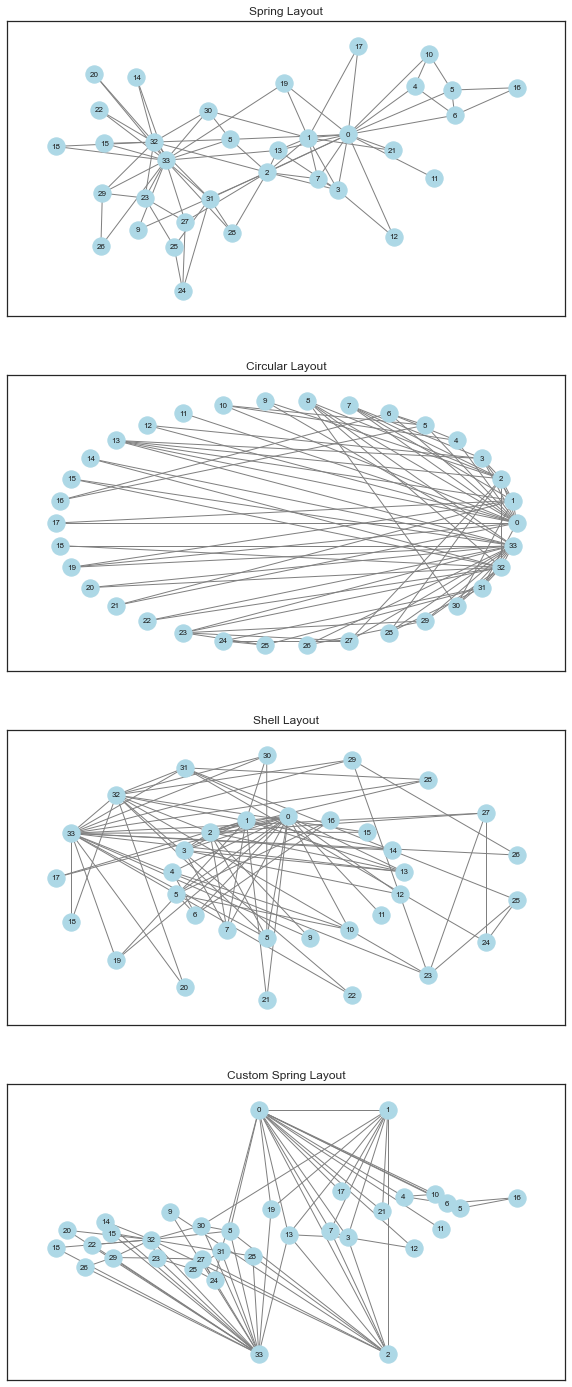

In [28]:
# Code to Visualize the Zachary's Karate Club Social Network in different layouts

import networkx as nx
import matplotlib.pyplot as plt

# Load the Zachary's Karate Club dataset
G = nx.karate_club_graph()

# Plot using spring layout
pos_spring = nx.spring_layout(G, seed=4)
plt.figure(figsize=(10, 25))

plt.subplot(411)
nx.draw_networkx(G, pos_spring, node_color='lightblue', font_size=8, edge_color='gray')
plt.title("Spring Layout")

# Plot using circular layout
pos_circular = nx.circular_layout(G)
plt.subplot(412)
nx.draw_networkx(G, pos_circular, node_color='lightblue', font_size=8, edge_color='gray')
plt.title("Circular Layout")

# Plot using shell Layout
shell_layout = [list(range(0, 17)), list(range(17, 34))]
pos_shell = nx.shell_layout(G, nlist=shell_layout)
plt.subplot(413)
nx.draw_networkx(G, pos_shell, node_color='lightblue', font_size=8, edge_color='gray')
plt.title("Shell Layout")

# Plot using spring layout with custom positions
pos_custom = nx.spring_layout(G, seed=4, iterations=200)
custom_positions = {0: (0.0, 1.5), 1: (.5, 1.5), 2: (0.5, -1.5), 33: (0.0, -1.5)}
pos_custom.update(custom_positions)
plt.subplot(414)
nx.draw_networkx(G, pos_custom, node_color='lightblue', font_size=8, edge_color='gray')
plt.title("Custom Spring Layout")

plt.show()

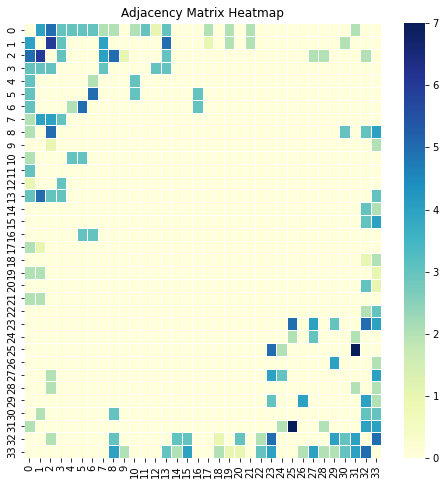

In [27]:
# Code to plot the heatmap for the Zachary's data 

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Zachary's Karate Club dataset
G = nx.karate_club_graph()

# Plot the social network
pos = nx.spring_layout(G, seed=4)  # Positioning algorithm with fixed seed for reproducibility

# Heatmap
adjacency_matrix = nx.to_numpy_matrix(G)
plt.figure(figsize=(8, 8))
sns.heatmap(adjacency_matrix, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title("Adjacency Matrix Heatmap")
plt.show()